In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
# =============================================================================
# =============================================================================
# # 문제 01 유형(DataSet_01.csv 이용)
#
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================
# =============================================================================

In [62]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

import pandas as pd
var_lst = ['TV', 'Radio', 'Social_Media']

dat1 = pd.read_csv('./data/Dataset_01.csv')
dat1.info()
dat1.columns
dat1.isna().sum().sum() # 답 : 26

# [참고] : 결측치가 포함된 행의 수
dat1.isna().any(axis=1).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

26

26

In [63]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

var_list=['TV', 'Radio', 'Social_Media', 'Sales']

q2=dat1.corr().drop('Sales')['Sales'].abs()


# 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술

q2.max() # 최대값
q2.idxmax() # 인덱스명
q2.argmax() # 위치번호
q2.nlargest(1) # 값과 인덱스명

round(q2.max(),4)

# 답: 0.9995

0.999497444941335

'TV'

0

TV    0.999497
Name: Sales, dtype: float64

0.9995

In [67]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================
var_list=['TV', 'Radio', 'Social_Media']

q3=dat1.dropna()

from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.api import OLS, add_constant

lm = LinearRegression(fit_intercept = True).fit(q3[var_lst], q3['Sales'])     # fit_intercept=True : 상수항 제거 x

# q3['Sales'].shape                           # (4546, ) 1차원 구조
# q3[['Sales']].shape                         # (4546, 1) 2차원 구조
# q3['Sales'].values.reshape(-1, 1).shape     # (4546, 1)

# print(dir(lm))
lm.intercept_       # 상수항 / 절편
lm.coef_            # 회귀계수

# OLS
# 범주형 변수 자동으로 더미형변수로 바꿔줌
# 식 : 'y~x1+C(x2)+x3-1'
# 식 : 'y~x1+x2+x3-1'
# -1 : 상수항 미포함
# C() : 범주형 데이터.. 카테고리입니다..
# 변수1 = ols(식, 데이터).fit()
# 변수1 = ols(식, 데이터)
# 변수2 = 변수1.fit()
# 변수1.fit() -> error
# ols('Sales~TV+Radio+Social_Media')
form1 = 'Sales~' + '+'.join(var_lst)
q3_ols = ols(form1, q3).fit()
# print(dir(q3_ols))
q3_ols.summary()
q3_ols.params.drop('Intercept').sort_values(ascending=False).values
# 답: [ 3.56256963,  0.00496402, -0.00397039])

# [참고] 유의미한 변수 찾기
q3_ols.pvalues[q3_ols.pvalues < 0.05].index

# print(dir(q3_ols))
outlier_score=q3_ols.outlier_test()
q3[outlier_score['bonf(p)'] < 0.05]

q3_ols_2=OLS(q3['Sales'], add_constant(q3[var_list])).fit()
q3_ols_2.summary()

-0.13396305194206093

array([ 3.56256963, -0.00397039,  0.00496402])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:03:46   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([ 3.56256963,  0.00496402, -0.00397039])

Index(['TV'], dtype='object')

,TV,Radio,Social_Media,Influencer,Sales


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:03:57   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

data2 = pd.read_csv('./data/Dataset_02.csv')


#%%

# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

q1 = data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)
q1[('F', 'HIGH', 'NORMAL')]

0.105

In [33]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================
import numpy as np

# 변수 생성
q2=data2.copy()

# np.where(조건) : 조건과 매칭되는 위치 리턴
# np.where(조건, 참 실행문, 거짓 실행문)
q2['Age_gr'] = np.where(q2.Age < 20, 10, 
                        np.where(q2.Age < 30, 20,
                        np.where(q2.Age < 40, 30,
                        np.where(q2.Age < 50, 40,
                        np.where(q2.Age < 60, 50, 60)))))
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1',
                        np.where(q2.Na_to_K <=20, 'Lv2',
                        np.where(q2.Na_to_K <=30, 'Lv3', 'Lv4')))

# 빈도 생성
tab = pd.crosstab(index = q2['Sex'], columns = q2['Drug'])
tab

# chi-square 검정
from scipy.stats import chi2_contingency

chi_test = chi2_contingency(tab)
pvalue = chi_test[1]

# 반복문
q2.columns
var_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

q2_out = []
for var in var_list:
    tab=pd.crosstab(index=q2[var], columns = q2['Drug'])
    chi_test = chi2_contingency(tab)
    pvalue = chi_test[1]
    q2_out.append([var, pvalue])

q2_out

# Drug 타입과 연관성이 있는 변수는 몇 개?

q2_out = pd.DataFrame(q2_out, columns = ['var', 'pvalue'])

q2_out_2 = q2_out[q2_out.pvalue < 0.05]
q2_out_2

# 연광성이 있는 변수 몇 개?
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하 버림
import math
print(len(q2_out_2), '%5f' % q2_out_2.pvalue.max())

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr',
       'Na_K_gr'],
      dtype='object')

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

,var,pvalue
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


4 0.000701


[Text(0.6, 0.8333333333333334, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(0.4, 0.5, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(0.2, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.6, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 91\nvalue = [91, 0, 0, 0, 0]\nclass = DrugY')]

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



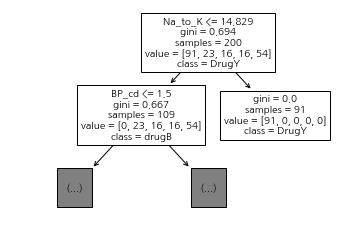

In [44]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

q3 = data2.copy()

# 변수 생성
q3['Sex_cd'] = np.where(q3.Sex == 'M', 0, 1)
q3['BP_cd'] = np.where(q3.BP == 'LOW', 0, 
                        np.where(q3.BP == 'NORMAL', 1, 2))
q3['Ch_cd'] = np.where(q3.Cholesterol == 'NORMAL' , 0, 1)

# 의사결정나무 적용 - 모델 생성
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

var_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']
dt = DecisionTreeClassifier().fit(q3[var_list], q3['Drug'])

# 모델 탐색, root node, rule 시각화, rule 텍스트 호출
plot_tree(dt, feature_names= var_list, class_names=q3['Drug'].unique(), max_depth = 1, fontsize=10)
print(export_text(dt, feature_names=var_list, decimals= 3))
# 답 : Na_to_K , 14.829

In [54]:
# =============================================================================
# =============================================================================
# # 문제 03 유형(DataSet_03.csv 이용)
# 
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================

data3 = pd.read_csv('./data/Dataset_03.csv')

q1 = data3.copy()

q1['forehead_ratio'] = q1['forehead_width_cm'] / q1['forehead_height_cm']

xbar = q1['forehead_ratio'].mean()
std = q1['forehead_ratio'].std()

UB = xbar + 3*std
LB = xbar - 3*std

len(q1[(q1['forehead_ratio'] > UB) | (q1['forehead_ratio'] < LB)])

# 답 : 3개

3

In [61]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================
q1.columns
g_m = q1[q1.gender == 'Male']['forehead_ratio']
g_f = q1[q1.gender == 'Female']['forehead_ratio']

from scipy.stats import ttest_ind       # 등분산 / 이분산 모르는 경우 bartlett도 import

q3_out = ttest_ind(g_m, g_f, equal_var=False, alternative="two-sided")
q3_out.pvalue
q3_out.pvalue < 0.01

# 답 : 0.0027186702390657176, Y

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender',
       'forehead_ratio'],
      dtype='object')

0.0027186702390657176

True